**Table of contents**<a id='toc0_'></a>    
- [Robot Setup](#toc1_)    
- [Fastron Learn](#toc2_)    
- [Candidate Pair](#toc3_)    
- [Estimate via Cellscore using A*](#toc4_)    
- [Estimate via Ellipse Sampling](#toc5_)    
- [SVM Estimator](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [9]:
import os
import numpy as np

np.random.seed(42)
np.set_printoptions(precision=2, suppress=True, linewidth=200)
rsrc = os.environ["RSRC_DIR"]

from geometric_fastron import *
from geometric_ellipse import *
from problem_planarrr import *

# <a id='toc1_'></a>[Robot Setup](#toc0_)

In [10]:
shapes = {
    # "shape1": {"x": -0.7, "y": 1.3, "h": 2, "w": 2.2},
    "shape1": {"x": -0.7, "y": 2.1, "h": 2, "w": 2.2},
    "shape2": {"x": 2, "y": -2.0, "h": 1, "w": 4.0},
    "shape3": {"x": -3, "y": -3, "h": 1.25, "w": 2},
}
obstacles = [
    box(k["x"], k["y"], k["x"] + k["w"], k["y"] + k["h"]) for k in shapes.values()
]
robot = PlanarRR()
scene = RobotScene(robot, obstacles)

# <a id='toc3_'></a>[Candidate Pair](#toc0_)

In [11]:
q1 = np.array([-1.0, 2.5])
q2 = np.array([1.0, 2.5])

q3 = np.array([0.15, 0.60])
q4 = np.array([2.5, 1.5])

q5 = np.array([-2.5, -1.5])
q6 = np.array([2.40, -0.4])

q7 = np.array([-2.0, 2.5])
q8 = np.array([1.0, -2.0])

q9 = np.array([-3.0, 0.0])
q10 = np.array([-3.0, 2.5])

# <a id='toc4_'></a>[Estimate via Cellscore using A*](#toc0_)

costgrid.shape: (9, 9)


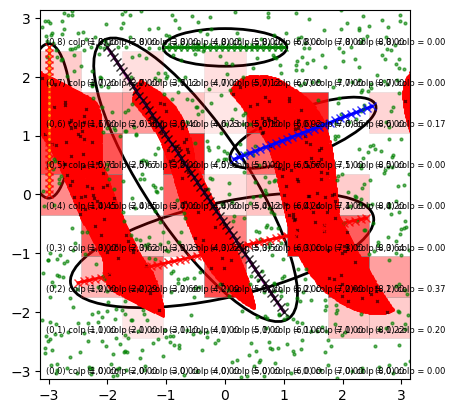

In [12]:
from geometric_pcm import is_point_in_ndcube, get_2d_rec_mplpatch
from matplotlib.colors import LinearSegmentedColormap
from geometric_ellipse import get_2d_ellipse_informed_mplpatch

numrand = 800
dof = 2
Xrand = np.random.uniform(-np.pi, np.pi, size=(numrand, dof))
Xrandfree = []
Xrandcoll = []
for i in range(numrand):
    theta = Xrand[i, :].reshape(-1, 1)
    best, _ = scene.distance_to_obstacles(theta)
    if best is None or best["distance"] > 0.0:
        Xrandfree.append(Xrand[i, :])
    else:
        Xrandcoll.append(Xrand[i, :])
Xrandfree = np.array(Xrandfree)
Xrandcoll = np.array(Xrandcoll)

cmine1 = np.linalg.norm(q2 - q1)
cmine2 = np.linalg.norm(q4 - q3)
cmine3 = np.linalg.norm(q6 - q5)
cmine4 = np.linalg.norm(q8 - q7)
cmine5 = np.linalg.norm(q10 - q9)
cmaxpercent = 1.05
cmaxe1 = cmaxpercent * cmine1
cmaxe2 = cmaxpercent * cmine2
cmaxe3 = cmaxpercent * cmine3
cmaxe4 = cmaxpercent * cmine4
cmaxe5 = cmaxpercent * cmine5
e1 = get_2d_ellipse_informed_mplpatch(
    q1.reshape(-1, 1),
    q2.reshape(-1, 1),
    cMax=cmaxe1,
)
e2 = get_2d_ellipse_informed_mplpatch(
    q3.reshape(-1, 1),
    q4.reshape(-1, 1),
    cMax=cmaxe2,
)
e3 = get_2d_ellipse_informed_mplpatch(
    q5.reshape(-1, 1),
    q6.reshape(-1, 1),
    cMax=cmaxe3,
)
e4 = get_2d_ellipse_informed_mplpatch(
    q7.reshape(-1, 1),
    q8.reshape(-1, 1),
    cMax=cmaxe4,
)
e5 = get_2d_ellipse_informed_mplpatch(
    q9.reshape(-1, 1),
    q10.reshape(-1, 1),
    cMax=cmaxe5,
)
patha = linear_interp(q1, q2, eta=0.1)
pathb = linear_interp(q3, q4, eta=0.1)
pathc = linear_interp(q5, q6, eta=0.1)
pathd = linear_interp(q7, q8, eta=0.1)
pathe = linear_interp(q9, q10, eta=0.1)

ax = scene.cspace_obstacles(plot=True)
ax.plot([q1[0], q2[0]], [q1[1], q2[1]], color="green", linewidth=2)
ax.plot([q3[0], q4[0]], [q3[1], q4[1]], color="blue", linewidth=2)
ax.plot([q5[0], q6[0]], [q5[1], q6[1]], color="red", linewidth=2)
ax.plot([q7[0], q8[0]], [q7[1], q8[1]], color="purple", linewidth=2)
ax.plot([q9[0], q10[0]], [q9[1], q10[1]], color="orange", linewidth=2)
ax.plot(Xrandfree[:, 0], Xrandfree[:, 1], "go", markersize=2, alpha=0.6)
ax.plot(Xrandcoll[:, 0], Xrandcoll[:, 1], "kx", markersize=2, alpha=0.6)

ax.plot(patha[:, 0], patha[:, 1], "gx", linewidth=3, alpha=0.8)
ax.plot(pathb[:, 0], pathb[:, 1], "bx", linewidth=3, alpha=0.8)
ax.plot(pathc[:, 0], pathc[:, 1], "rx", linewidth=3, alpha=0.8)
ax.plot(pathd[:, 0], pathd[:, 1], "kx", linewidth=3, alpha=0.8)
ax.plot(pathe[:, 0], pathe[:, 1], "rx", linewidth=3, alpha=0.8)

ax.add_patch(e1)
ax.add_patch(e2)
ax.add_patch(e3)
ax.add_patch(e4)
ax.add_patch(e5)

ax.set_aspect("equal", "box")
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)

npoint = 10
dof = 2
ngaps = npoint - 1
line = np.linspace(-np.pi, np.pi, npoint)

costshape = tuple([ngaps] * dof)
costgrid = np.full(shape=costshape, fill_value=0.0)
print("costgrid.shape:", costgrid.shape)

sqrtcentershape = tuple([ngaps] * dof + [dof])
sqrcenter = np.empty(sqrtcentershape, dtype=float)
length = line[1] - line[0]
for i in range(ngaps):
    for j in range(ngaps):
        sqrcenter[i, j, 0] = line[i] + length / 2.0
        sqrcenter[i, j, 1] = line[j] + length / 2.0

# compute cell scores
cumsum_pointinsquare = np.zeros_like(costgrid)
cumsum_collision = np.zeros_like(costgrid)
for i in range(ngaps):
    for j in range(ngaps):
        for p in Xrand:
            if is_point_in_ndcube(p, sqrcenter, length, (i, j)):
                cumsum_pointinsquare[i, j] += 1
                theta = p.reshape(-1, 1)
                best, _ = scene.distance_to_obstacles(theta)
                if best["distance"] <= 0.0:
                    cumsum_collision[i, j] += 1
cellscore = cumsum_collision / (cumsum_pointinsquare + 0.0001)
np.save(os.path.join(rsrc, "cspace_grid_cellscore.npy"), cellscore)

freecolor = "white"
colcolor = "red"
cmap = LinearSegmentedColormap.from_list("custom_cmap", [freecolor, colcolor])

for i in range(ngaps):
    for j in range(ngaps):
        rect = get_2d_rec_mplpatch(sqrcenter[i, j], length, "red", cellscore[i, j])
        ax.add_patch(rect)
        s = f"({i},{j}) colp = {cellscore[i, j]:.2f}"
        ax.text(
            sqrcenter[i, j, 0] - length / 2.0 + 0.1,
            sqrcenter[i, j, 1] - length / 2.0 + 0.1,
            s,
            fontsize=6,
        )
plt.show()

# <a id='toc5_'></a>[Estimate via Ellipse Sampling](#toc0_)

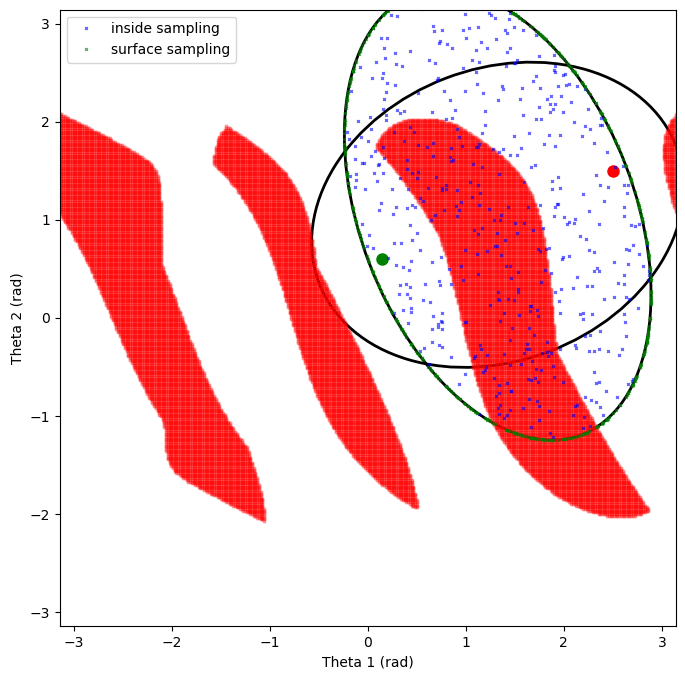

In [13]:
qs = q3.reshape(-1, 1)
qe = q4.reshape(-1, 1)

# custom axis lengths
long_axis = 1.4
short_axis = 2.4
L = hyperellipsoid_custom_axis_length(long_axis, short_axis)
XRANDIN = [elliptical_sampling(qs, qe, L, unit_ball_sampling) for _ in range(500)]
XRANDIN = np.array(XRANDIN).reshape(-1, 2)
XRANDOUT = [
    elliptical_sampling(qs, qe, L, unit_ball_surface_sampling) for _ in range(500)
]
XRANDOUT = np.array(XRANDOUT).reshape(-1, 2)

# real informed axis lengths
cMax = 1.55 * np.linalg.norm(qe - qs)
cMin = np.linalg.norm(qe - qs)
L = hyperellipsoid_informed_axis_length(cMax, cMin, dof)

# plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(qs[0], qs[1], "go", markersize=8)
ax.plot(qe[0], qe[1], "ro", markersize=8)
ax.plot(
    cspace_obs[:, 0],
    cspace_obs[:, 1],
    "ro",
    markersize=2,
    alpha=0.3,
)
el = get_2d_ellipse_custom_mplpatch(qs, qe, long_axis, short_axis)
ax.add_patch(el)
elinf = get_2d_ellipse_informed_mplpatch(qs, qe, cMax)
ax.add_patch(elinf)
ax.plot(
    XRANDIN[:, 0],
    XRANDIN[:, 1],
    "bx",
    markersize=2,
    alpha=0.6,
    label="inside sampling",
)
ax.plot(
    XRANDOUT[:, 0],
    XRANDOUT[:, 1],
    "gx",
    markersize=2,
    alpha=0.6,
    label="surface sampling",
)

ax.set_xlabel("Theta 1 (rad)")
ax.set_ylabel("Theta 2 (rad)")
ax.set_aspect("equal", "box")
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
ax.legend()
plt.show()

# <a id='toc6_'></a>[SVM Estimator](#toc0_)

Training data shape (1000, 2) (1000,)


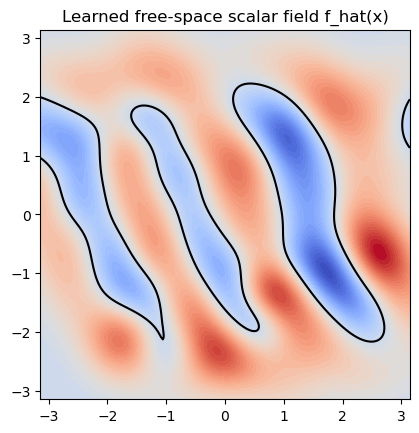

In [14]:
from geometric_svmest import *

dataset = np.load(os.path.join(rsrc, "cspace_dataset.npy"))
samples_id = np.random.choice(
    range(dataset.shape[0]), size=N_TRAIN, replace=False
)
dataset_samples = dataset[samples_id]
X_train = dataset_samples[:, 0:2]
y = dataset_samples[:, 2]
y_train = np.where(y <= 0, -1, +1)  # switch sign
print("Training data shape", X_train.shape, y_train.shape)

# train SVM
alpha = svm_train(X_train, y_train, sigma)
xfreeguarantee = np.array([[0.0, 0.0]])
alpha = sign_correction(xfreeguarantee, f_hat, alpha, X_train, y_train, sigma)

# visualize learned f_hat
grid = 200
xs = np.linspace(-np.pi, np.pi, grid)
ys = np.linspace(-np.pi, np.pi, grid)
XX, YY = np.meshgrid(xs, ys)
XY = np.column_stack([XX.ravel(), YY.ravel()])
Z = f_hat(XY, X_train, alpha, y_train, sigma).reshape(grid, grid)
fig, ax = plt.subplots()
ax.contourf(XX, YY, Z, levels=50, cmap="coolwarm")
ax.contour(XX, YY, Z, levels=[0], colors="black")
ax.set_aspect("equal")
ax.set_title("Learned free-space scalar field f_hat(x)")
plt.show()

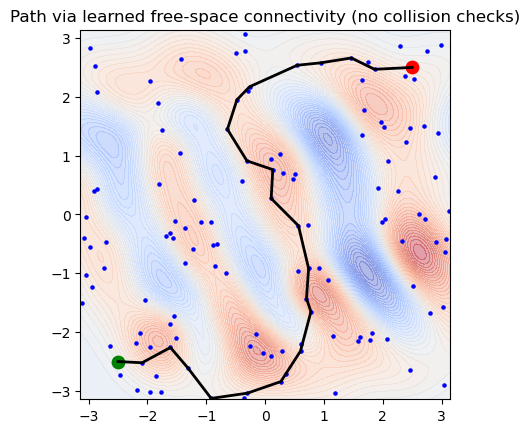

In [15]:
# estimate adjacency matrix
X_nodes = np.random.uniform(
    low=jointlim[:, 0], high=jointlim[:, 1], size=(N_NODES, dof)
)
start = np.array([-2.5, -2.5])
goal = np.array([2.5, 2.5])
C, X_all = estimate_adj_matrix(
    start, goal, X_nodes, f_hat, (X_train, alpha, y_train, sigma)
)
pathq, pathl = estimate_shortest_path(C, X_all)

# visualize path
fig, ax = plt.subplots()
ax.contourf(XX, YY, Z, levels=50, cmap="coolwarm", alpha=0.4)
ax.scatter(X_all[:, 0], X_all[:, 1], s=5, c="blue")
ax.plot(pathq[:, 0], pathq[:, 1], "k-", linewidth=2)
ax.scatter(*start, c="green", s=80)
ax.scatter(*goal, c="red", s=80)
ax.set_aspect("equal")
ax.set_title("Path via learned free-space connectivity (no collision checks)")
plt.show()

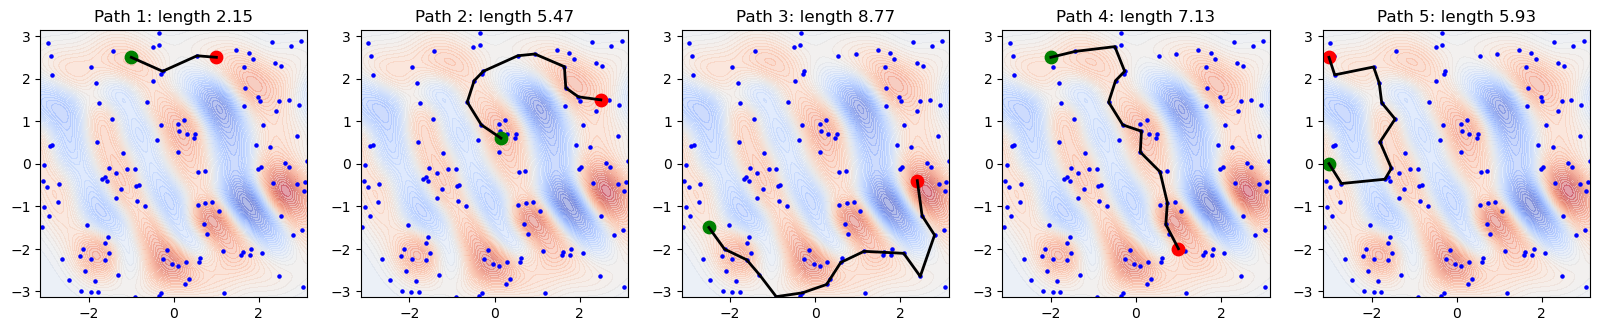

In [16]:
sgpairs = {
    0: (q1, q2),
    1: (q3, q4),
    2: (q5, q6),
    3: (q7, q8),
    4: (q9, q10),
}

pathsave = {x: [] for x in sgpairs}
pathlengthsave = {x: 0.0 for x in sgpairs}
X_allsave = {x: None for x in sgpairs}

for key, (start, goal) in sgpairs.items():
    C, X_all = estimate_adj_matrix(
        start, goal, X_nodes, f_hat, (X_train, alpha, y_train, sigma)
    )
    pathq, pathl = estimate_shortest_path(C, X_all)
    pathsave[key] = pathq
    pathlengthsave[key] = pathl
    X_allsave[key] = X_all

fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for key, ax in enumerate(axs):
    start, goal = sgpairs[key]
    X_all = X_allsave[key]
    pathq = pathsave[key]
    Z = f_hat(XY, X_train, alpha, y_train, sigma).reshape(grid, grid)

    ax.contourf(XX, YY, Z, levels=50, cmap="coolwarm", alpha=0.4)
    ax.scatter(X_all[:, 0], X_all[:, 1], s=5, c="blue")
    ax.plot(pathq[:, 0], pathq[:, 1], "k-", linewidth=2)
    ax.scatter(*start, c="green", s=80)
    ax.scatter(*goal, c="red", s=80)
    ax.set_aspect("equal")
    ax.set_title(f"Path {key+1}: length {pathlengthsave[key]:.2f}")
plt.show()